In [229]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import sys
sys.path.append("../")

from kernel import InverseMultiquadricKernelPytouch
from mtgp import MultiTaskGaussianProcessImplicitSurfaces

import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use("ggplot")

%matplotlib inline

In [230]:
def plot_all(model, x1, y1, x2, y2, rate):
    x   = np.linspace(-10, 70, 200)[:, None] * rate
    y   = np.linspace(-10, 70, 200)[:, None] * rate
    x,y = np.meshgrid(x, y)
    xx  = x.ravel()[:, None]
    yy  = y.ravel()[:, None]
    XX  = np.concatenate([xx, yy], 1)
    XX  = torch.from_numpy(XX).float()

    mm1, ss1 = model.predict(XX, 0)
    mm2, ss2 = model.predict(XX, 1)

    d = np.where(abs(mm2.T[0]) < 0.1)
    e = xx.T[0][d]
    f = yy.T[0][d]

    plt.xlim(-0.1, 0.7)
    plt.ylim(-0.1, 0.7)


    mm1 = mm1.reshape(x.shape)
    mm2 = mm2.reshape(x.shape)

    z = mm2.numpy()

    xyz = plt.pcolormesh(x, y, z, cmap='Greens', shading="gouraud", vmax=z.max(), vmin=z.min())

    x2_ = (np.concatenate([np.linspace(12, 48, N2), np.ones(N2)*48, np.linspace(48, 12, N2), np.ones(N2)*12]) ) * rate  
    y2_ = (np.concatenate([np.ones(N2)*22, np.linspace(22, 48, N2), np.ones(N2)*48, np.linspace(48, 22, N2)]) ) * rate 
    plt.plot(x2_, y2_, linewidth=5, c='black')
    
    plt.plot(x1_0, y1_0, linewidth=5, alpha=0.5, c='red')
    plt.plot(x2_0, y2_0, linewidth=5, c='blue')
    plt.scatter(e,f, s=10, c='navy')
    # plt.scatter(e,f)
    #     plt.colorbar(xyz)
    # plt.savefig('mtgpis.png')
    plt.show()

    # %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1.ravel(), y1.ravel(), np.array(Y1).ravel())
    ax.scatter(x2.ravel(), y2.ravel(), np.array(Y2).ravel())

    surf = ax.plot_surface(x, y, z, cmap='bwr', linewidth=0)
    fig.colorbar(surf)
    # plt.savefig('mtgpis_3d.png')
    plt.show()

In [231]:
N1 = 10
N2 = 10
rate = 0.01 # data scale
%matplotlib inline

In [232]:
x1_0 = (np.concatenate([np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1), np.ones(N1)*10]) ) * rate
x1_1 = (np.concatenate([np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1), np.ones(N1)*8]) ) * rate
x1    = np.concatenate([x1_0, x1_1])[:, None]

y1_0 = (np.concatenate([np.ones(N1)*10, np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1)]) ) * rate
y1_1 = (np.concatenate([np.ones(N1)*8, np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1)]) ) * rate
y1    = np.concatenate([y1_0, y1_1])[:, None]

X1 = np.concatenate([x1,y1],1)
Y1 = np.concatenate([np.zeros(len(x1_0)), np.ones(len(x1_1)) ])[:, None]
T1 = 0

In [233]:
step = 4
x2_0 = (np.concatenate([np.linspace(12, 48, N2), np.ones(N2)*48, np.linspace(48, 12, N2), np.ones(N2)*12]) ) * rate  
x2_1 = (np.concatenate([np.linspace(10, 50, N2), np.ones(N2)*50, np.linspace(50, 10, N2), np.ones(N2)*10]) ) * rate 
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*22, np.linspace(22, 48, N2), np.ones(N2)*48, np.linspace(48, 22, N2)]) ) * rate 
y2_1 = (np.concatenate([np.ones(N2)*20, np.linspace(20, 50, N2), np.ones(N2)*50, np.linspace(50, 20, N2)]) ) * rate 
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

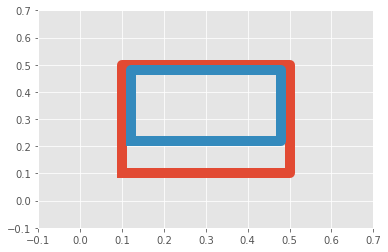

In [234]:
plt.plot(x1_0, y1_0, linewidth=10)
plt.plot(x2_0, y2_0, linewidth=10)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)

plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

# STEP1

In [209]:
step = 1
x2_0 = (np.concatenate([np.linspace(22, 35, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
x2_1 = (np.concatenate([np.linspace(20, 37, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*22]) + np.random.randn(N2*step) * 0.2) * rate 
y2_1 = (np.concatenate([np.ones(N2)*20]) + np.random.randn(N2*step) * 0.2) * rate 
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

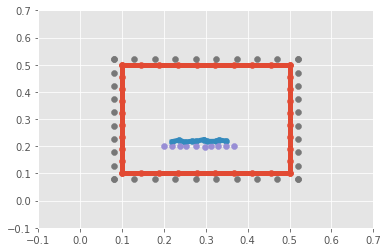

In [210]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

plt.scatter(x2_1, y2_1)
plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [211]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[3.9852, 2.0944],
        [2.0944, 3.2862]])
sigma: tensor(-3.5771)
kernel: tensor([0.1900])
----- after learning -----
tensor([[3.9852, 2.0944],
        [2.0944, 3.2862]])


In [212]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[1.2127056, 0.6373311],
       [0.6373311, 1.       ]], dtype=float32)

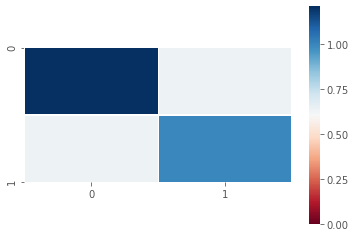

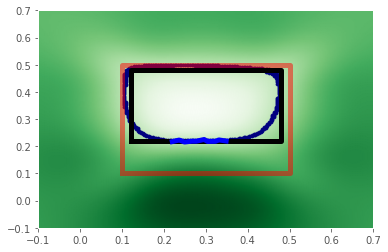

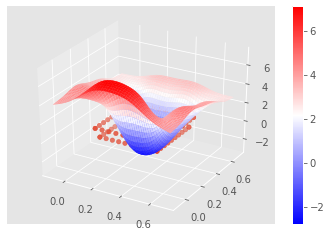

In [213]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

# STEP2

In [214]:
x2_0 = (np.concatenate([np.linspace(22, 48, N2), np.ones(N2)*48]) + np.random.randn(N2*2) * 0.2) * rate 
x2_1 = (np.concatenate([np.linspace(22, 50, N2), np.ones(N2)*50]) + np.random.randn(N2*2) * 0.2) * rate 
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*22, np.linspace(22, 48, N2)]) + np.random.randn(N2*2) * 0.2) * rate 
y2_1 = (np.concatenate([np.ones(N2)*20, np.linspace(20, 50, N2)]) + np.random.randn(N2*2) * 0.2) * rate 
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*2), np.ones(N2*2)])[:, None]
T2 = 1

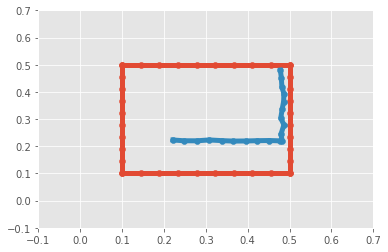

In [215]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [216]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
# model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel, task_kernel_params=model.task_kernel_params)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[3.5651, 2.4361],
        [2.4361, 3.6981]])
sigma: tensor(-3.4779)
kernel: tensor([0.1871])
----- after learning -----
tensor([[3.5651, 2.4361],
        [2.4361, 3.6981]])


In [217]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.96404773, 0.6587604 ],
       [0.6587604 , 1.        ]], dtype=float32)

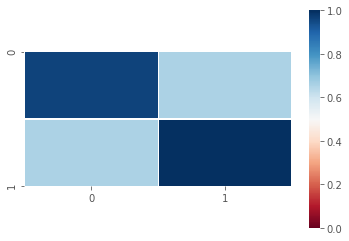

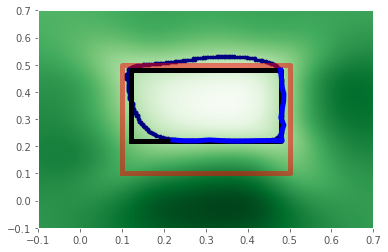

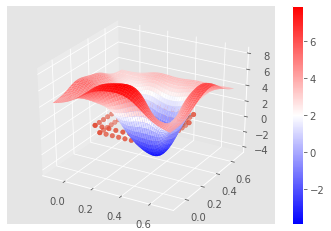

In [218]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

# STEP3

In [219]:
step = 3
x2_0 = (np.concatenate([np.linspace(22, 48, N2), np.ones(N2)*48, np.linspace(48, 12, N2)]) + np.random.randn(N2*step) * 0.2) * rate  
x2_1 = (np.concatenate([np.linspace(22, 50, N2), np.ones(N2)*50, np.linspace(50, 10, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*22, np.linspace(22, 48, N2), np.ones(N2)*48]) + np.random.randn(N2*step) * 0.2) * rate 
y2_1 = (np.concatenate([np.ones(N2)*20, np.linspace(20, 50, N2), np.ones(N2)*50]) + np.random.randn(N2*step) * 0.2) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

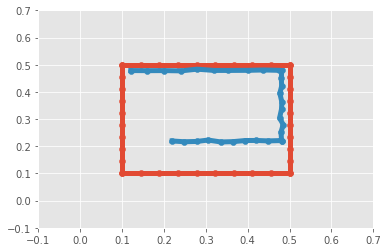

In [220]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [221]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
# model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel, task_kernel_params=model.task_kernel_params)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[2.0445, 2.2382],
        [2.2382, 2.7644]])
sigma: tensor(-3.8066)
kernel: tensor([0.1442])
----- after learning -----
tensor([[2.0445, 2.2382],
        [2.2382, 2.7644]])


In [222]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.7395805, 0.8096479],
       [0.8096479, 1.       ]], dtype=float32)

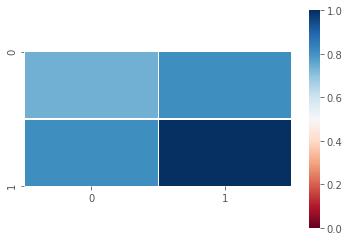

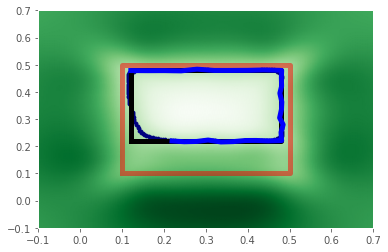

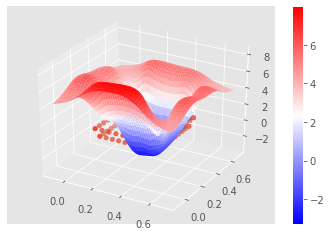

In [223]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

# STEP4

In [224]:
step = 4
x2_0 = (np.concatenate([np.linspace(12, 48, N2), np.ones(N2)*48, np.linspace(48, 12, N2), np.ones(N2)*12]) + np.random.randn(N2*step) * 0.2) * rate  
x2_1 = (np.concatenate([np.linspace(10, 50, N2), np.ones(N2)*50, np.linspace(50, 10, N2), np.ones(N1)*10]) + np.random.randn(N2*step) * 0.2) * rate 
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*22, np.linspace(22, 48, N2), np.ones(N2)*48, np.linspace(48, 22, N2)]) + np.random.randn(N2*step) * 0.2) * rate 
y2_1 = (np.concatenate([np.ones(N2)*20, np.linspace(20, 50, N2), np.ones(N2)*50, np.linspace(50, 20, N2)]) + np.random.randn(N2*step) * 0.2) * rate
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

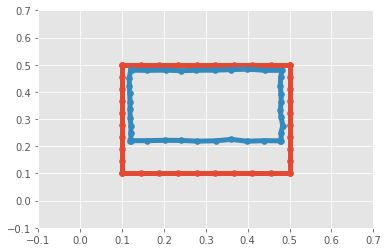

In [225]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [226]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
# model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel, task_kernel_params=model.task_kernel_params)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[1.1516, 1.3354],
        [1.3354, 1.5874]])
sigma: tensor(-4.4893)
kernel: tensor([0.1131])
----- after learning -----
tensor([[1.1516, 1.3354],
        [1.3354, 1.5874]])


In [227]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.7254834, 0.8412576],
       [0.8412576, 1.       ]], dtype=float32)

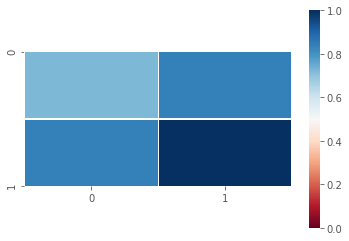

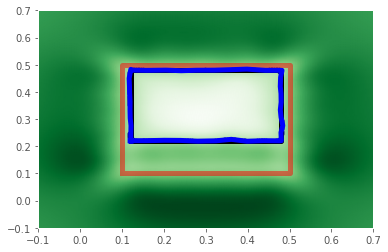

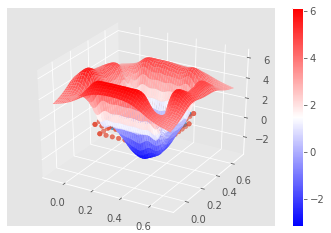

In [228]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)